In [ ]:
! pip install dython
from dython.nominal import associations

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import operator

In [ ]:
# Load the dataset.
df = pd.read_csv("/content/CS668dataset.csv")

In [ ]:
df.shape

(4424, 35)

In [ ]:
# Gather basic information about the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [ ]:
# Rename column Nacionality.
df.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

# Get all categorical variables except target.
cat_cols = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance',
          'Previous qualification', 'Nationality', "Mother's qualification", "Father's qualification",
          "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor',
          'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

# Get all continuous variables.
cont_cols = ['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
             'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
             'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
             'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
             'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
             'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
             'Unemployment rate', 'Inflation rate', 'GDP']

# Change categorical columns to category datatype.
df[cat_cols] = df[cat_cols].astype('category')

In [ ]:
df.describe(include=['category', 'O'])

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,18,8,17,2,17,21,29,34,32,46,2,2,2,2,2,2,2,3
top,1,1,1,12,1,1,1,1,27,10,10,1,0,0,1,0,0,0,Graduate
freq,3919,1708,3026,766,3941,3717,4314,1069,1209,1577,1010,2426,4373,3921,3896,2868,3325,4314,2209


In [ ]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [ ]:
students = df.copy()

In [ ]:
# Let's use this color palette.
sns.color_palette('muted')

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [ ]:
# Adjust some seaborn settings.
colors = sns.color_palette('muted')
sns.set_palette('muted')
sns.set_style('ticks')
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8'})

# Assign each categorical variable its own color.
colors_gender = {'Female': colors[0], 'Male': colors[1]}
colors_attendance = {'Evening': colors[0], 'Daytime': colors[1]}
colors_binary = {'Yes': colors[0], 'No': colors[1]}
colors_target = {'Graduate': colors[-1], 'Dropout': colors[-2], 'Enrolled': colors[4]}

In [ ]:
# Show all unique values of target variable.
students['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

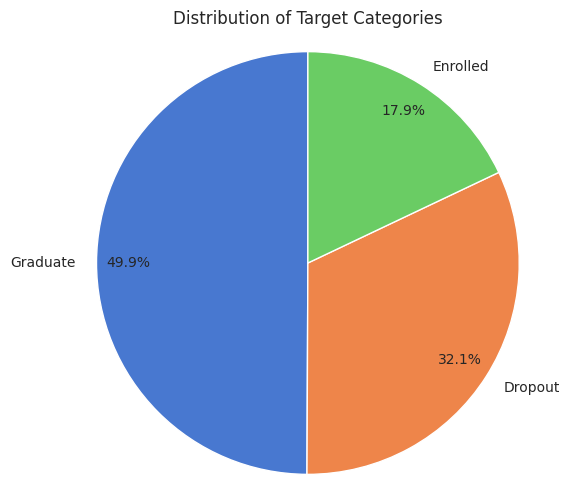

In [ ]:
plt.figure(figsize=(6, 6))
data = df['Target'].value_counts()
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.axis('equal')
plt.title('Distribution of Target Categories')

plt.show()

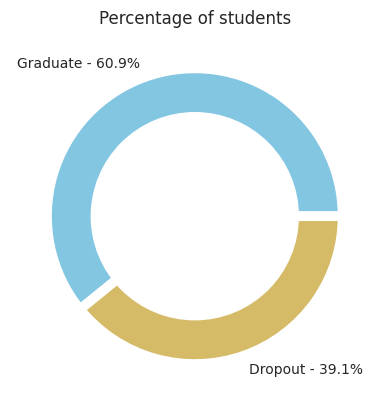

In [ ]:
# Exclude currently enrolled students.
data = students[students['Target'] != 'Enrolled']['Target'].value_counts()

# Create a pie chart.
circle = plt.Circle((0,0), 0.7, color='white')
labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
plt.pie(data, labels=labels, wedgeprops = {'linewidth' : 7, 'edgecolor' : 'white'},
        colors=[colors_target.get(i) for i in data.index])
plt.title('Percentage of students')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

In [ ]:
# Replace 0 and 1 values with Female and Male respectively.
students = students.replace({'Gender': {0: 'Female', 1: 'Male'}})

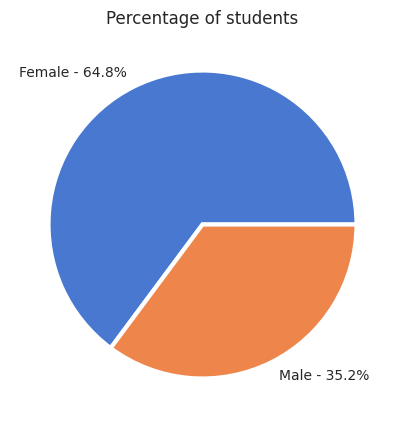

In [ ]:
fig, (ax1) = plt.subplots(nrows=1,figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)

data = students['Gender'].value_counts()

# Create a pie chart.
labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
ax1.pie(data, labels=labels, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'},
        colors=[colors_gender.get(i) for i in data.index])
ax1.set_title('Percentage of students')


plt.show()

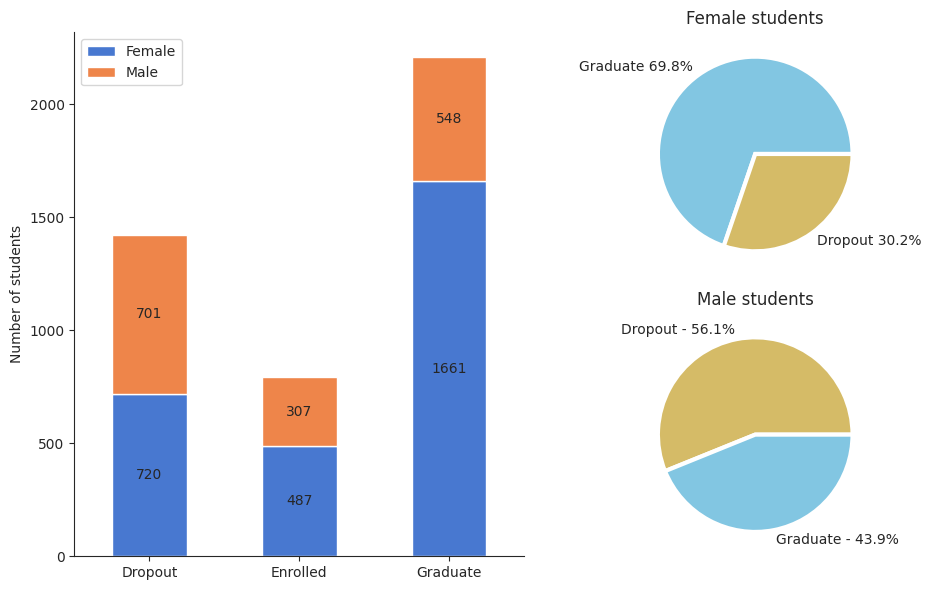

In [ ]:
fig = plt.figure(figsize=(10, 6), tight_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=2)

# Create a stacked barchart.
ax1 = fig.add_subplot(gs[:, 0])
data = students.groupby(['Gender', 'Target']).size().reset_index().pivot(columns='Gender', index='Target', values=0)
data.plot(ax=ax1, kind='bar', stacked=True, color=[colors_gender.get(i) for i in data.columns])
for cont in ax1.containers:
    ax1.bar_label(cont, label_type='center')
ax1.spines[['right', 'top']].set_visible(False)
ax1.set(xlabel=None, ylabel='Number of students')
ax1.legend_.set_title(None)
plt.xticks(rotation=0)

# Create a pie chart for female students.
females = students[(students['Gender'] == 'Female') & (students['Target'] != 'Enrolled')]['Target'].value_counts()
labels = [f'{label} {np.round(females[label] / females.sum() * 100, 1)}%' for label in females.index]
ax2 = fig.add_subplot(gs[0, 1])
patches, texts = ax2.pie(females, labels=labels, colors=[colors_target.get(i) for i in females.index],
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax2.set(title='Female students')

# Create a pie chart for male students.
males = students[(students['Gender'] == 'Male') & (students['Target'] != 'Enrolled')]['Target'].value_counts()
labels = [f'{label} - {np.round(males[label] / males.sum() * 100, 1)}%' for label in males.index]
ax3 = fig.add_subplot(gs[1, 1])
ax3.pie(males, labels=labels, colors=[colors_target.get(i) for i in males.index],
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax3.set(title='Male students')

plt.show()


In [ ]:
# Find the optimal number of bins using Sturges’ rule.
bins = int(math.ceil(math.log2(len(df))) + 1)
age_min = students['Age at enrollment'].min()
age_max = students['Age at enrollment'].max()
bin_int = students['Age at enrollment'].max() // bins
bin_edges = [i for i in range(age_min, age_max + bin_int, bin_int)]

# Perform binning on Age at enrollment column.
age_labels = [f'{bin_edges[i]}-{bin_edges[i + 1]}' for i in range(len(bin_edges) - 1)]
students['Age at enrollment bins'] = pd.cut(students['Age at enrollment'], bin_edges, labels=age_labels)

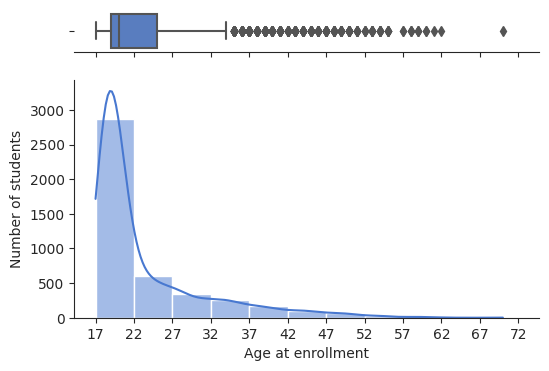

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6, 4), gridspec_kw={"height_ratios": (.15, .85)})

# Create a boxplot.
ax1 = sns.boxplot(data=students, x='Age at enrollment', ax=ax1)
ax1.set(xlabel=None)

# Create a histogram.
labels = students['Age at enrollment'].value_counts()
labels = [f'{label} - {round(males[label] / males.sum() * 100)}%' for label in males.index]
ax2 = sns.histplot(data=df, x='Age at enrollment', ax=ax2, bins=bins, binwidth=bin_int, kde=True)
ax2.set(ylabel='Number of students')
sns.despine(ax=ax1, left=True)
sns.despine(ax=ax2)


# Adjust x ticks.
plt.xticks(bin_edges)
plt.show()

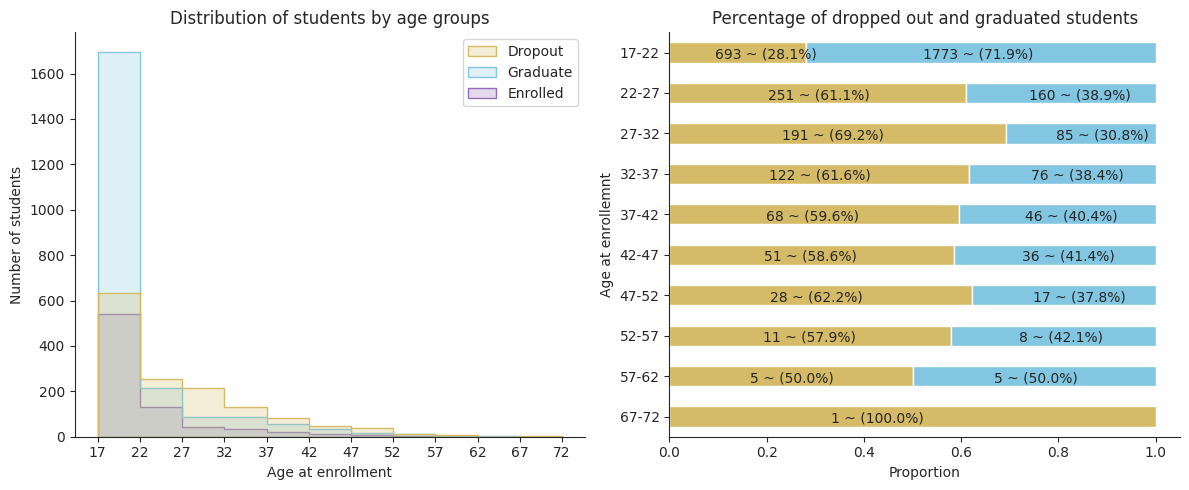

In [ ]:
fig = plt.figure(figsize=(12, 5), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)

# Create a histogram.
ax1 = fig.add_subplot(gs[0, 0])
ax1 = sns.histplot(data=students, x='Age at enrollment', hue='Target', element='step', bins=bins,
                  binwidth=bin_int, palette=colors_target)
ax1.set(ylabel='Number of students')
ax1.legend_.set_title(None)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title('Distribution of students by age groups')
plt.xticks([i for i in range(age_min, age_max + bin_int, bin_int)])

# Create a stacked bar plot.
ax2 = fig.add_subplot(gs[0, 1])
data = pd.crosstab(index=students['Age at enrollment bins'], columns=students[students['Target'] != 'Enrolled']['Target'])
data_prop = pd.crosstab(index=students['Age at enrollment bins'], columns=students[students['Target'] != 'Enrolled']['Target'], normalize='index')
labels = [i for i in age_labels if i in data.index]
data_prop.loc[labels[::-1]].plot(ax=ax2, kind='barh', stacked=True, color=[colors_target.get(i) for i in data.columns])
ax2.set(xlabel='Proportion', ylabel='Age at enrollemnt')
ax2.get_legend().remove()
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[labels[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        if proportion:
            plt.text(x=(y_loc - proportion) + (proportion / 3), y=n - 0.15, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()


In [ ]:
# Replace numerical values with their verbal analogs.
students[['Nationality']] = students[['Nationality']].replace({'Nationality': {1: 'Portuguese', 2: 'German', 3: 'Spanish',
                                                               4: 'Italian', 5: 'Dutch', 6: 'English',
                                                               7: 'Lithuanian', 8: 'Angolan', 9: 'Cape Verdean',
                                                               10: 'Guinean', 11: 'Mozambican', 12: 'Santomean',
                                                               13: 'Turkish', 14: 'Brazilian', 15: 'Romanian',
                                                               16: 'Moldovan', 17: 'Mexican', 18: 'Ukrainian',
                                                               19: 'Russian', 20: 'Cuban', 21: 'Colombian'}})

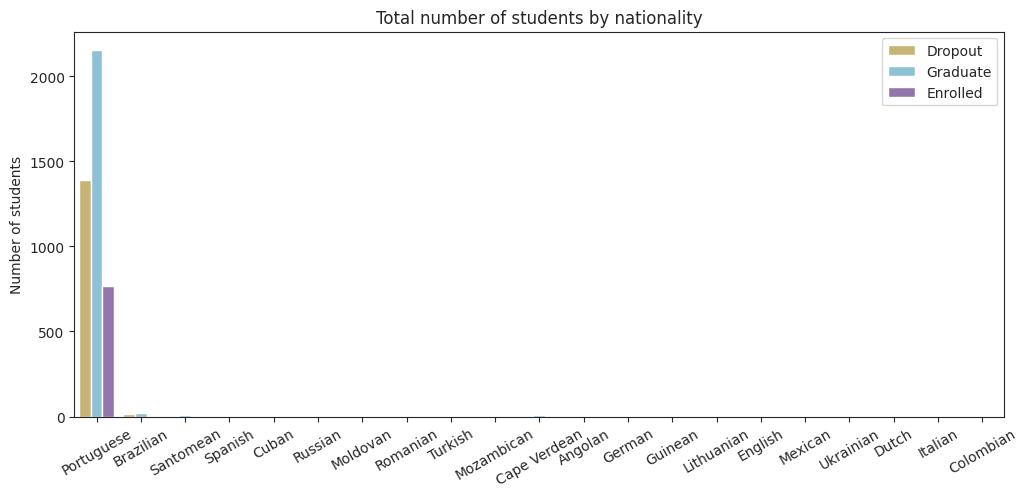

In [ ]:
# Create a count plot.
fig, ax = plt.subplots(figsize=(12, 5))
order = students[students['Target'] == 'Enrolled']['Nationality'].value_counts()
ax = sns.countplot(data=students, x='Nationality', hue='Target', palette=colors_target, order=order.index)
ax.set(xlabel=None, ylabel='Number of students', title='Total number of students by nationality')
plt.xticks(rotation=30)
ax.legend_.set_title(None)
plt.show()

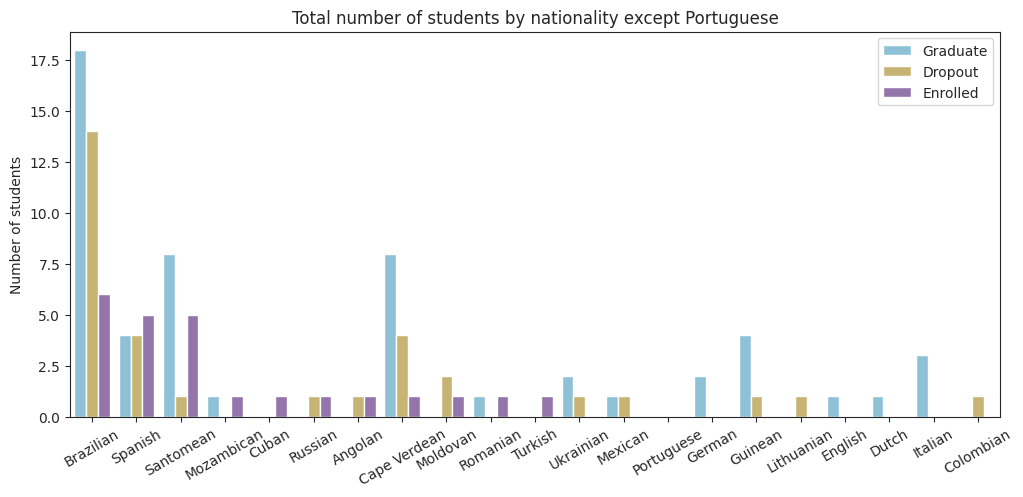

In [ ]:
# Create a count plot wothout Portuguese students.
fig, ax = plt.subplots(figsize=(12, 5))
data = students[students['Nationality'] != 'Portuguese']
order = data[data['Target'] == 'Enrolled']['Nationality'].value_counts()
ax = sns.countplot(data=data, x='Nationality', hue='Target', palette=colors_target, order=order.index)
ax.set(xlabel=None, ylabel='Number of students', title='Total number of students by nationality except Portuguese')
plt.xticks(rotation=30)
ax.legend_.set_title(None)
plt.show()

In [ ]:
# Replace 1 - Single, 2 - Married, 3 - Widower, 4 - Divorced, 5 - Facto union, and 6 - Legally separated.
students = students.replace({'Marital status': {1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced',
                                    5: 'Facto union', 6: 'Legally separated'}})

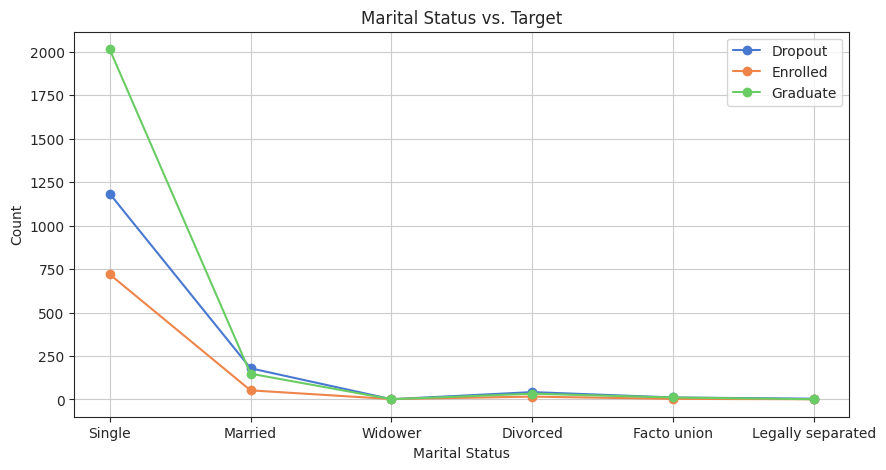

In [ ]:
cross_tab = pd.crosstab(index=students['Marital status'], columns=students['Target'])
plt.figure(figsize=(10, 5))

for target_category in cross_tab.columns:
    plt.plot(cross_tab.index, cross_tab[target_category], marker='o', label=target_category)

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status vs. Target')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Replace 0 and 1 values with Female and Male respectively.
students = students.replace({'Daytime/evening attendance': {0: 'Evening', 1: 'Daytime'}})

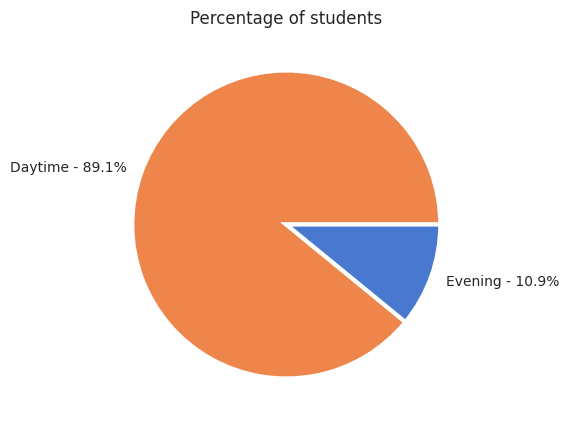

In [ ]:
fig, (ax1) = plt.subplots(nrows=1,figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)

data = students['Daytime/evening attendance'].value_counts()

# Create a pie chart.
labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
ax1.pie(data, labels=labels, colors=[colors_attendance.get(i) for i in data.index],
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax1.set_title('Percentage of students')

plt.show()

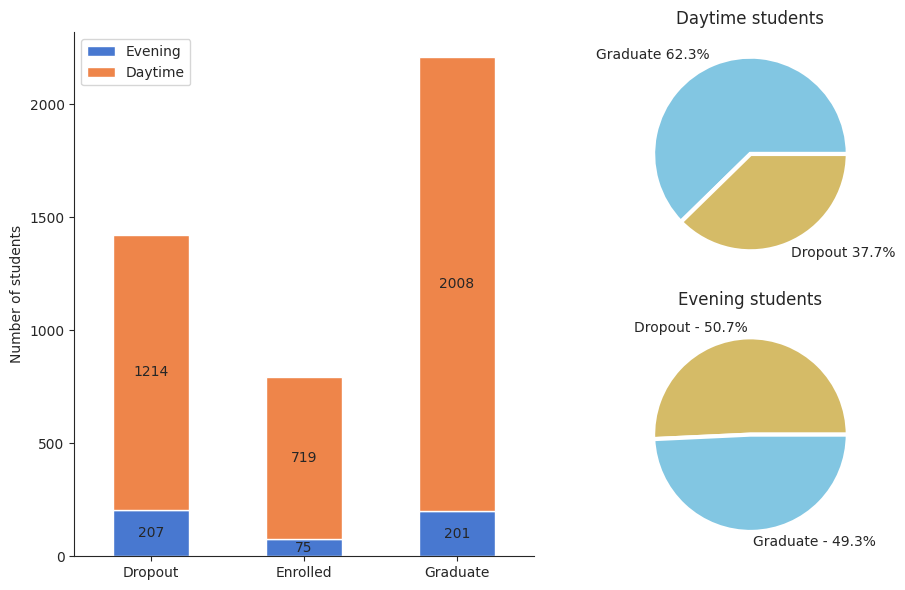

In [ ]:
fig = plt.figure(figsize=(10, 6), tight_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=2)

# Create a stacked barchart.
ax1 = fig.add_subplot(gs[:, 0])
data = students.groupby(['Daytime/evening attendance',
                   'Target']).size().reset_index().pivot(columns='Daytime/evening attendance', index='Target', values=0)
data.plot(ax=ax1, kind='bar', stacked=True, color=[colors_attendance.get(i) for i in data.columns])
for cont in ax1.containers:
    ax1.bar_label(cont, label_type='center')
ax1.spines[['right', 'top']].set_visible(False)
ax1.set(xlabel=None, ylabel='Number of students')
ax1.legend_.set_title(None)
plt.xticks(rotation=0)

# Create a pie chart for daytime students.
daytime = students[(students['Daytime/evening attendance'] == 'Daytime') & (students['Target'] != 'Enrolled')]['Target'].value_counts()
labels = [f'{label} {np.round(daytime[label] / daytime.sum() * 100, 1)}%' for label in daytime.index]
ax2 = fig.add_subplot(gs[0, 1])
patches, texts = ax2.pie(daytime, labels=labels, colors=[colors_target.get(i) for i in daytime.index],
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax2.set(title='Daytime students')

# Create a pie chart for evening students.
evening = students[(students['Daytime/evening attendance'] == 'Evening') & (students['Target'] != 'Enrolled')]['Target'].value_counts()
labels = [f'{label} - {np.round(evening[label] / evening.sum() * 100, 1)}%' for label in evening.index]
ax3 = fig.add_subplot(gs[1, 1])
ax3.pie(evening, labels=labels, colors=[colors_target.get(i) for i in evening.index],
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax3.set(title='Evening students')

plt.show()


In [ ]:
# Replace numerical values with their verbal analogs.
students[['Course']] = students[['Course']].replace({'Course': {1: 'Biofuel Production Technologies', 2: 'Animation and Multimedia Design',
                                                    3: 'Social Service (evening attendance)', 4: 'Agronomy',
                                                    5: 'Communication Design', 6: 'Veterinary Design',
                                                    7: 'Informatics Engineering', 8: 'Equiniculture', 9: 'Management',
                                                    10: 'Social Service', 11: 'Tourism', 12: 'Nursing', 13: 'Oral Hygiene',
                                                    14: 'Advertising and Marketing Management',
                                                    15: 'Journalism and Communication', 16: 'Basic Education',
                                                    17: 'Management (evening attendance)'}})

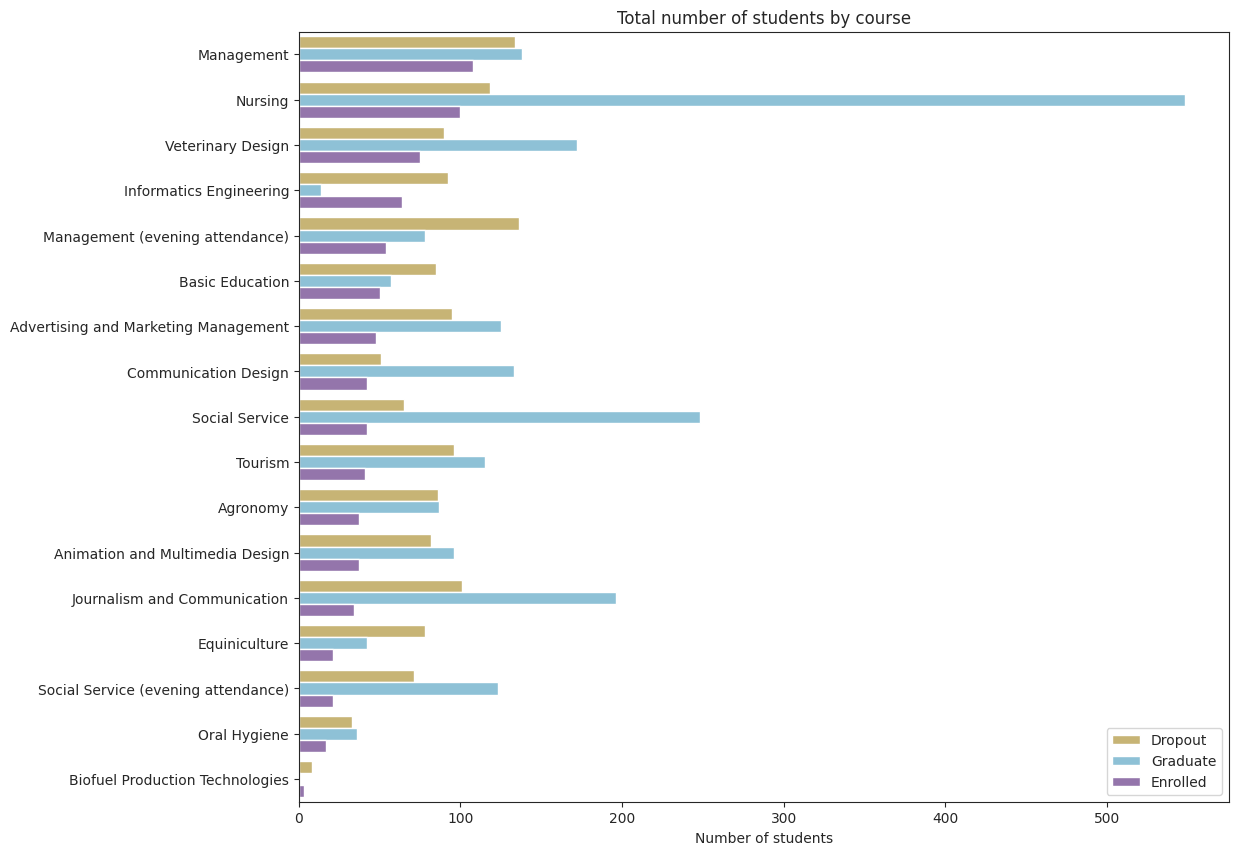

In [ ]:
# Create a count plot.
fig, ax = plt.subplots(figsize=(12, 10))
order = students[students['Target'] == 'Enrolled']['Course'].value_counts().index
ax = sns.countplot(data=students, y='Course', hue='Target', palette=colors_target, order=order)
ax.set(xlabel='Number of students', ylabel=None, title='Total number of students by course')
ax.legend_.set_title(None)
plt.show()

In [ ]:
cols = ['Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'International']
# Replace 0 and 1 values with No and Yes respectively.
for col in cols:
    students = students.replace({col: {0: 'No', 1: 'Yes'}})

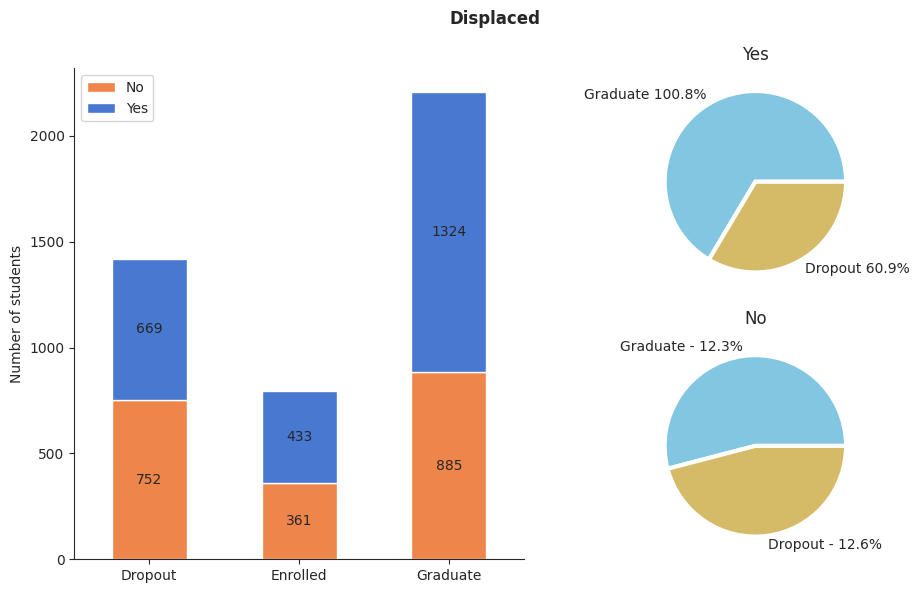

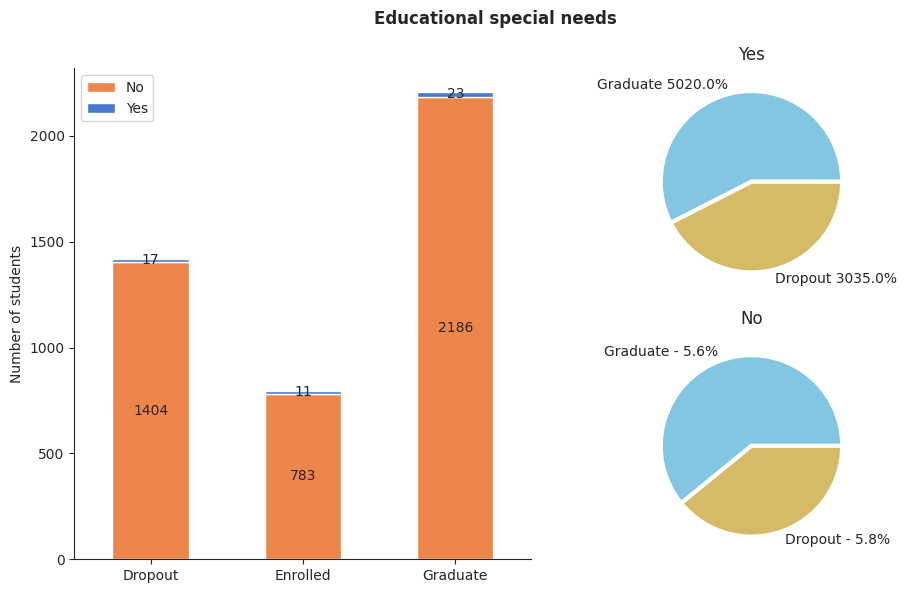

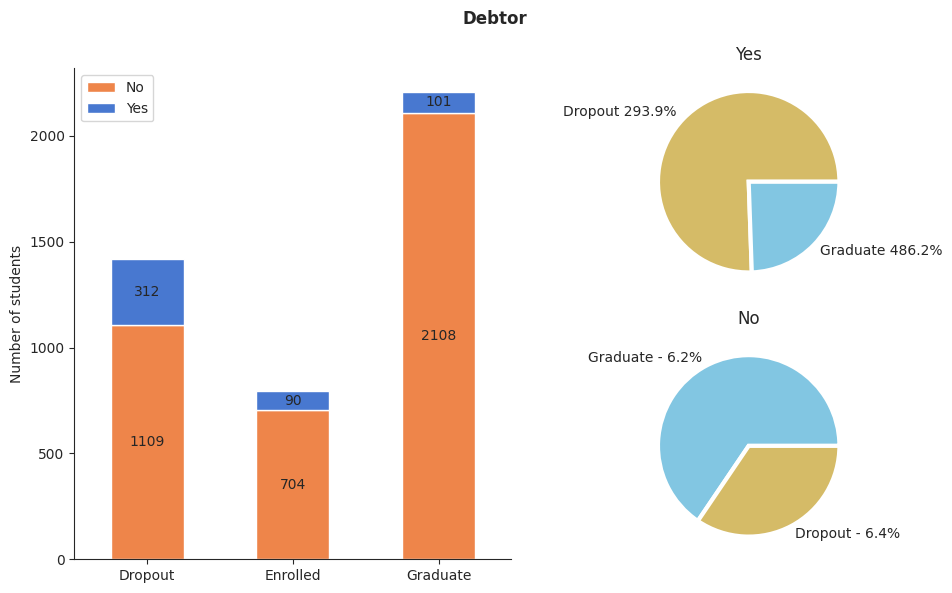

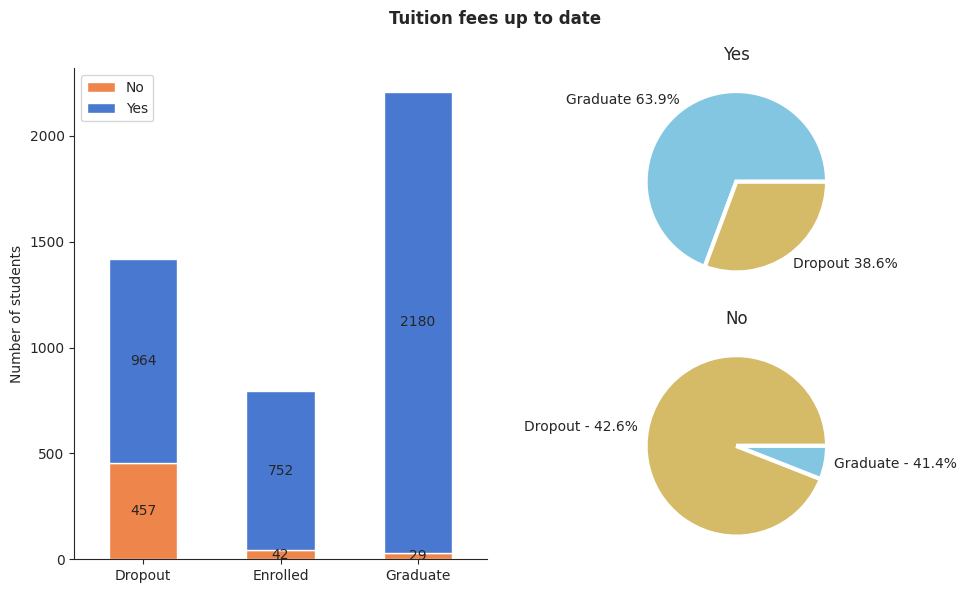

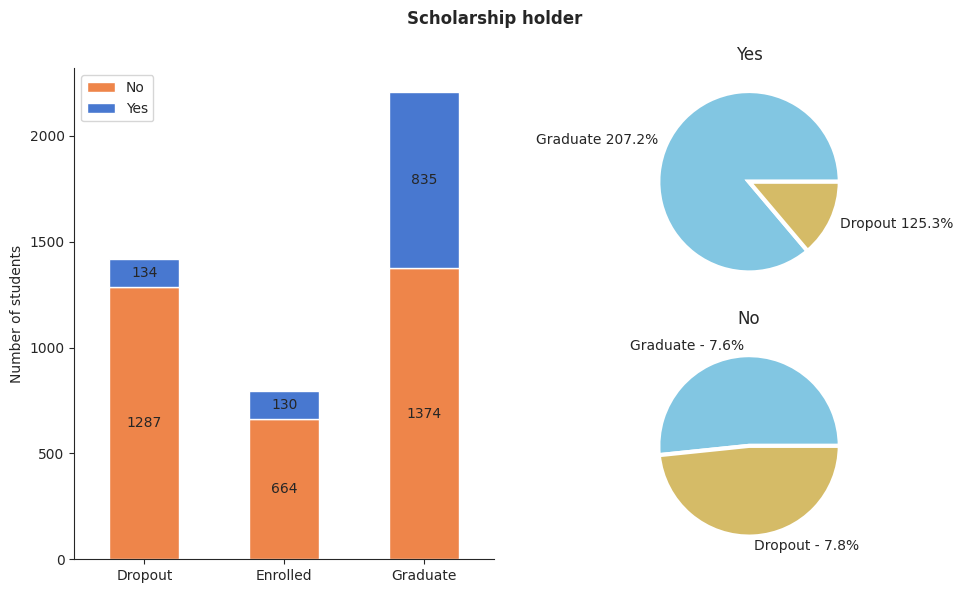

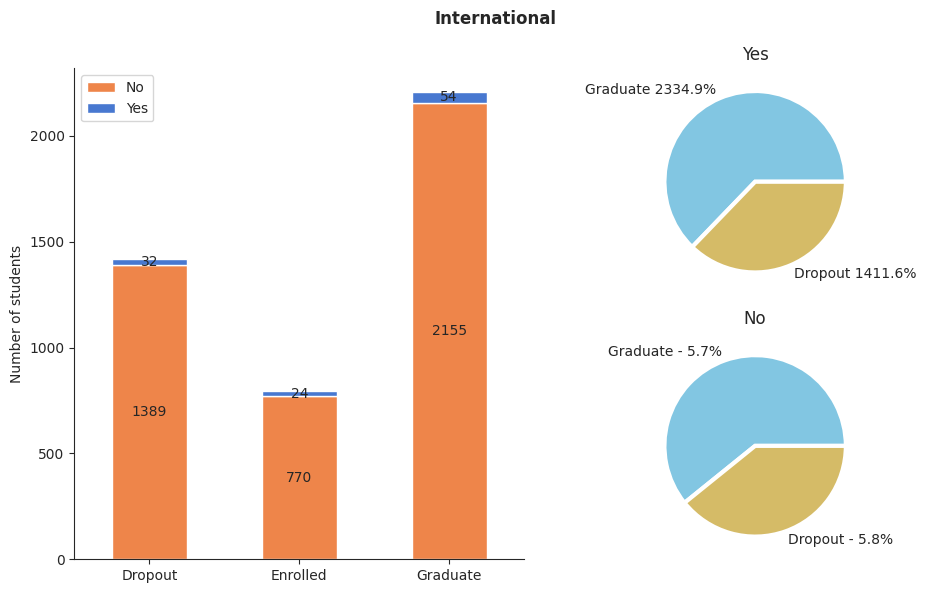

In [ ]:
for col in cols:
    fig = plt.figure(figsize=(10, 6), tight_layout=True)
    gs = fig.add_gridspec(nrows=2, ncols=2)

    # Create a stacked barchart.
    ax1 = fig.add_subplot(gs[:, 0])
    data = students.groupby([col, 'Target']).size().reset_index().pivot(columns=col,
                                                                  index='Target', values=0)
    data.plot(ax=ax1, kind='bar', stacked=True, color=[colors_binary.get(i) for i in data.columns])
    for cont in ax1.containers:
        ax1.bar_label(cont, label_type='center')
    ax1.spines[['right', 'top']].set_visible(False)
    ax1.set(xlabel=None, ylabel='Number of students')
    ax1.legend_.set_title(None)
    plt.xticks(rotation=0)

    # Create a pie chart with parameter Yes.
    yes = students[(students[col] == 'Yes') & (students['Target'] != 'Enrolled')]['Target'].value_counts()
    labels = [f'{label} {np.round(daytime[label] / yes.sum() * 100, 1)}%' for label in yes.index]
    ax2 = fig.add_subplot(gs[0, 1])
    patches, texts = ax2.pie(yes, labels=labels, colors=[colors_target.get(i) for i in yes.index],
            wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
    ax2.set(title='Yes')

    # Create a pie chart with parameter No.
    no = students[(students[col] == 'No') & (students['Target'] != 'Enrolled')]['Target'].value_counts()
    labels = [f'{label} - {np.round(evening[label] / no.sum() * 100, 1)}%' for label in no.index]
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.pie(no, labels=labels, colors=[colors_target.get(i) for i in no.index],
            wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
    ax3.set(title='No')

    fig.suptitle(col, weight='bold')

    plt.show()


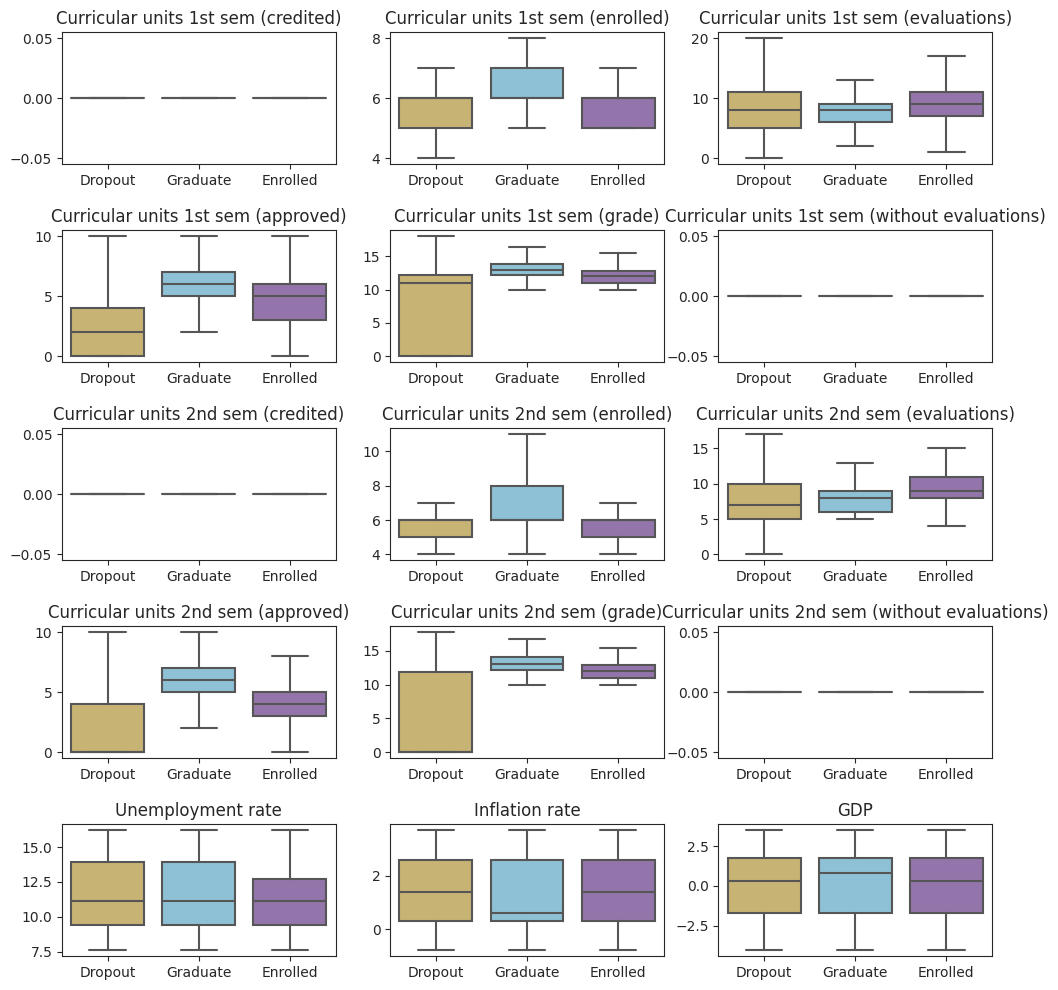

In [ ]:
fig, axs = plt.subplots(5, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)
cols = ['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']

index = 0

for i in range(5):
    for j in range(3):
        sns.boxplot(students, x='Target', y=cols[index], showfliers=False, palette=colors_target, ax=axs[i, j])
        axs[i, j].set(xlabel=None, ylabel=None, title=cols[index])
        index += 1


In [ ]:
#Feature engineering
# Copy the original dataset.
students = df.copy()

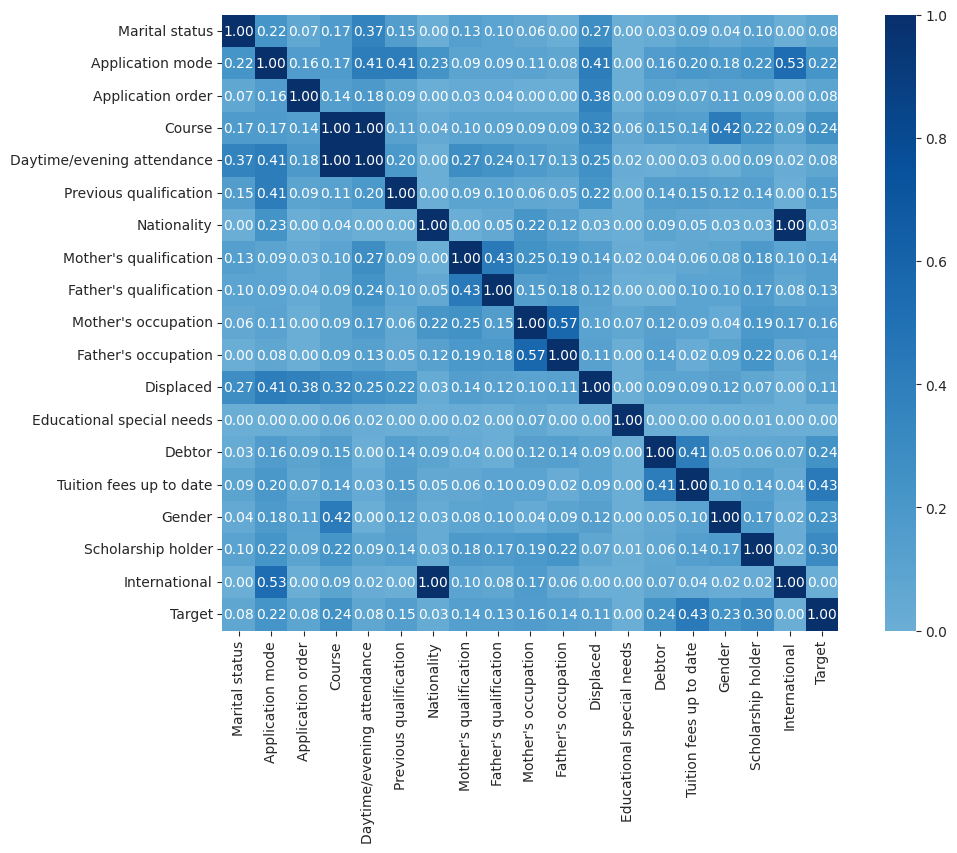

In [ ]:
cols = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance',
        'Previous qualification', 'Nationality', "Mother's qualification", "Father's qualification",
        "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor',
        'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target']

fig, ax = plt.subplots(figsize = (12, 8))

# Estimate and generate Cramer's V association plot.
cramers_v = associations(students[cols], nom_nom_assoc='cramer', ax=ax, cmap='Blues')

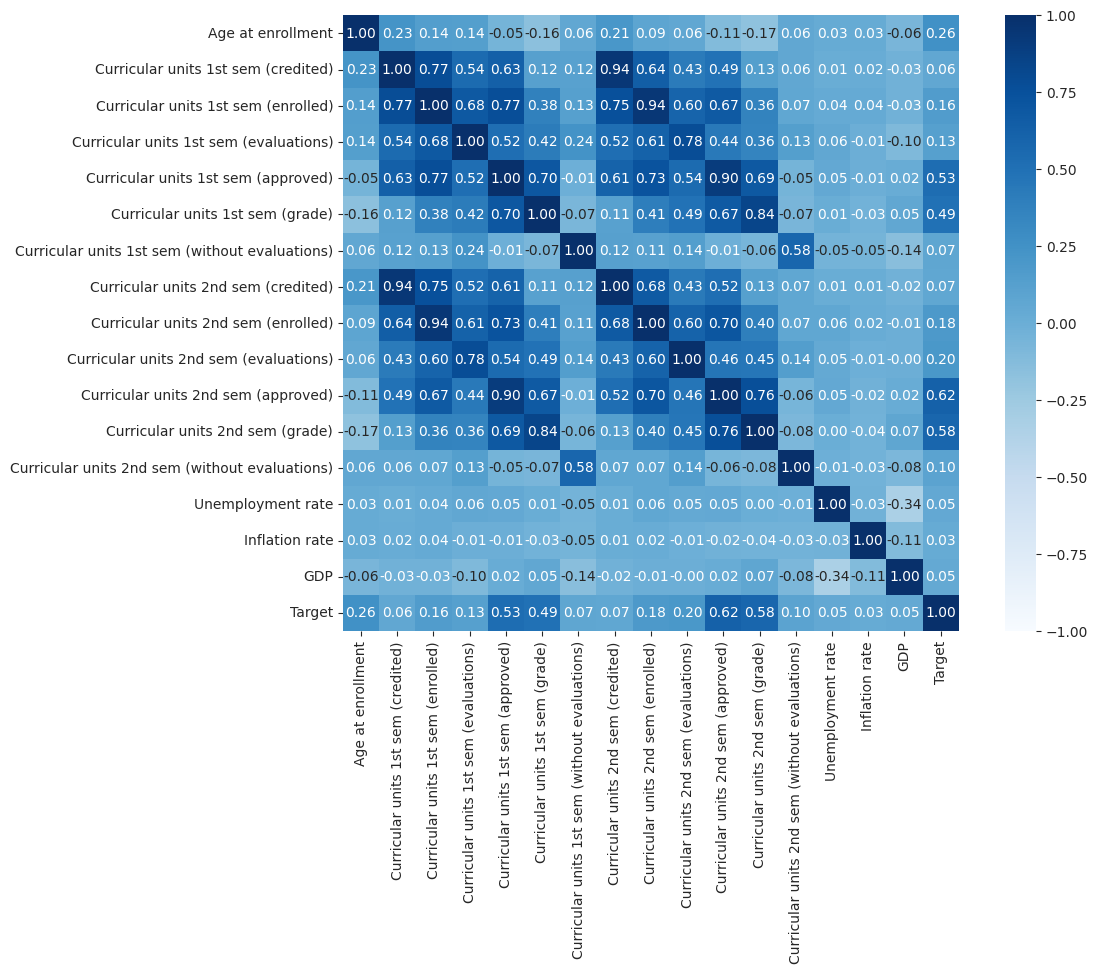

In [ ]:
cols = ['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
           'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
           'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
           'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
           'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
           'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']

fig, ax = plt.subplots(figsize = (12, 8))

# Estimate and generate coorelation ratio association plot.
cor_ratio = associations(students[cols], nom_num_assoc='correlation_ratio', num_num_assoc='pearson', ax=ax, cmap='Blues')

In [ ]:
cols = ['Application mode', 'Course', 'Previous qualification', 'Tuition fees up to date',
        'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (approved)',
        'Curricular units 2nd sem (approved)', 'Target']

# Keep only relevant columns.
students = students[cols]

# Remove enrolled students.
students = students[students['Target'] != 'Enrolled']

# Convert into numerical data type.
students = students.replace({'Target': {'Dropout': 0, 'Graduate': 1}})
cols = ['Tuition fees up to date', 'Gender', 'Scholarship holder', 'Target']
students[cols] = students[cols].astype('int32')

# Perform one-hot encoding.
students = pd.get_dummies(students, drop_first=True)

In [ ]:
# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics

In [ ]:
results = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [ ]:
# Predicting variable.
y = students['Target']

# Predictor features.
X = students.copy()
X = X.drop('Target', axis = 1)

# Create training and test sets, 75% and 25% respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
def conf_matrix_plot(model, x_data, y_data):

    model_pred = model.predict(x_data)
    cm = metrics.confusion_matrix(y_data, model_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Dropout', 'Graduate'], )
    disp.plot(values_format='')
    plt.show()

In [ ]:
def plot_roc_curve(true_y, y_prob):

    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    auc = metrics.roc_auc_score(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.text(0.95, 0.05, 'AUC = %0.3f' % auc, ha='right', weight='bold')

In [ ]:
def print_results(algo, y_test, y_preds):

    global results
    print(algo)
    print("Accuracy:", "%.3f" % metrics.accuracy_score(y_test, y_preds))
    print("Precision:", "%.3f" % metrics.precision_score(y_test, y_preds))
    print("Recall:", "%.3f" % metrics.recall_score(y_test, y_preds))
    print("F1 Score:", "%.3f" % metrics.f1_score(y_test, y_preds))
    # Write results into a dataframe.
    row = {'Algorithm': algo, 'Accuracy': metrics.accuracy_score(y_test, y_preds),
           'Precision': metrics.precision_score(y_test, y_preds), 'Recall': metrics.recall_score(y_test, y_preds),
           'F1 Score': metrics.f1_score(y_test, y_preds)}
    results = pd.concat([results, pd.DataFrame(row, index=[0])], ignore_index=True)
    results = results.reset_index(drop=True)

In [ ]:
# NaiveBayes

In [ ]:
# Normalize data.
X_scaled_train = StandardScaler().fit_transform(X_train)
X_scaled_test = StandardScaler().fit_transform(X_test)
# Fit the model.
gnb = GaussianNB()
gnb.fit(X_scaled_train, y_train)
# Get the predictions on test data.
y_preds = gnb.predict(X_scaled_test)

In [ ]:
print_results('Naive Bayes', y_test, y_preds)

Naive Bayes
Accuracy: 0.404
Precision: 0.250
Recall: 0.002
F1 Score: 0.004


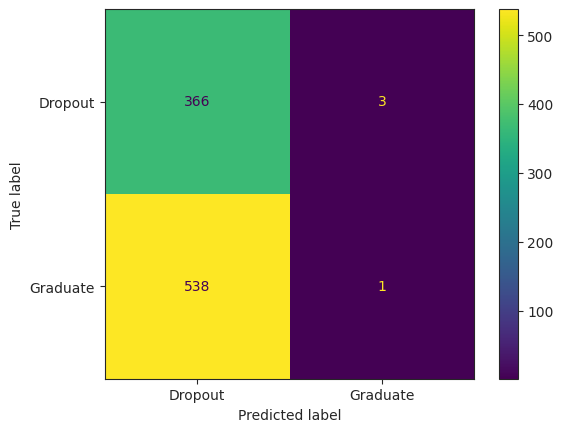

In [ ]:
conf_matrix_plot(gnb, X_scaled_test, y_test)

In [ ]:
# Logistic Regression

In [ ]:
X_scaled_train = StandardScaler().fit_transform(X_train)
X_scaled_test = StandardScaler().fit_transform(X_test)
lr = LogisticRegression()
lr.fit(X_scaled_train, y_train)
y_preds = lr.predict(X_scaled_test)

In [ ]:
print_results('Logistic regression', y_test, y_preds)

Logistic regression
Accuracy: 0.883
Precision: 0.871
Recall: 0.942
F1 Score: 0.906


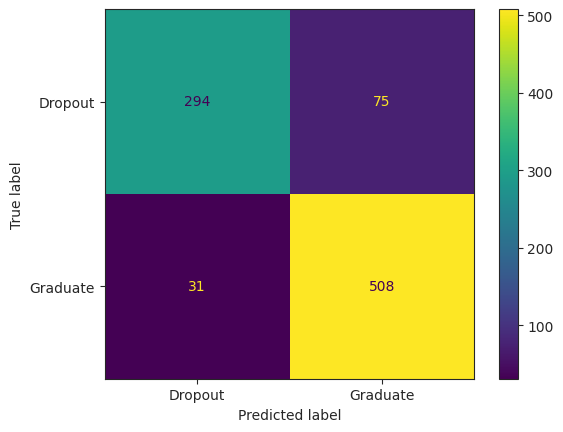

In [ ]:
conf_matrix_plot(lr, X_scaled_test, y_test)

In [ ]:
# SVM

In [ ]:
X_scaled_train = StandardScaler().fit_transform(X_train)
X_scaled_test = StandardScaler().fit_transform(X_test)
svm = SVC(probability=True)
svm.fit(X_scaled_train, y_train)
y_preds = svm.predict(X_scaled_test)

In [ ]:
print_results('SVM', y_test, y_preds)

SVM
Accuracy: 0.879
Precision: 0.856
Recall: 0.957
F1 Score: 0.904


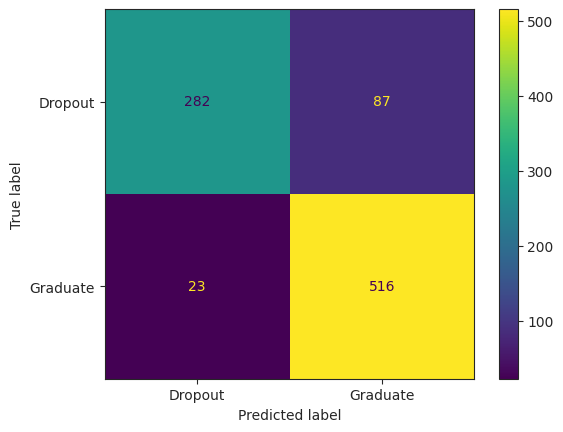

In [ ]:
conf_matrix_plot(svm, X_scaled_test, y_test)

In [ ]:
# Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
y_preds = decision_tree.predict(X_test)

In [ ]:
print_results('Decision Tree', y_test, y_preds)

Decision Tree
Accuracy: 0.857
Precision: 0.865
Recall: 0.900
F1 Score: 0.882


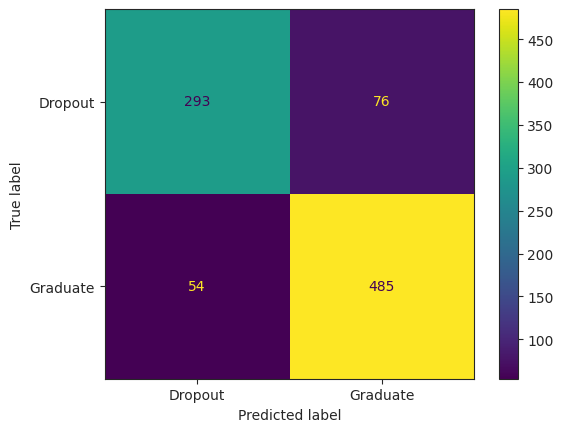

In [ ]:
conf_matrix_plot(decision_tree, X_test, y_test)

In [ ]:
# Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_preds = rf.predict(X_test)

In [ ]:
print_results('Random forest', y_test, y_preds)

Random forest
Accuracy: 0.896
Precision: 0.887
Recall: 0.946
F1 Score: 0.916


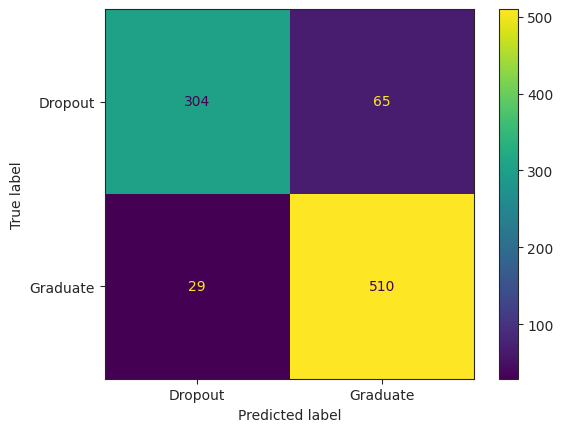

In [ ]:
conf_matrix_plot(rf, X_test, y_test)

In [ ]:
# XG Boost Classifier

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
xgb.fit(X_train, y_train)
y_preds = xgb.predict(X_test)

In [ ]:
print_results('XGBoost', y_test, y_preds)

XGBoost
Accuracy: 0.898
Precision: 0.882
Recall: 0.955
F1 Score: 0.917


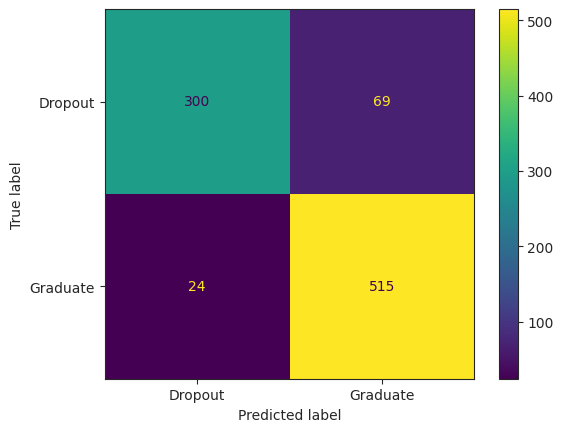

In [ ]:
conf_matrix_plot(xgb, X_test, y_test)

In [ ]:
# Models Evaluations

In [ ]:
# Compare models.
results.sort_values(by=['Accuracy'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score
5,XGBoost,0.897577,0.881849,0.955473,0.917186
4,Random forest,0.896476,0.886957,0.946197,0.915619
1,Logistic regression,0.883260,0.871355,0.942486,0.905526
2,SVM,0.878855,0.855721,0.957328,0.903678
3,Decision Tree,0.856828,0.864528,0.899814,0.881818
0,Naive Bayes,0.404185,0.250000,0.001855,0.003683


from matplotlib import pyplot as plt
_df_0['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['F1 Score'].plot(kind='hist', bins=20, title='F1 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Algorithm').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Recall', y='F1 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['F1 Score'].plot(kind='line', figsize=(8, 4), title='F1 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Algorithm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='Accuracy', y='Algorithm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Algorithm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Precision', y='Algorithm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Algorithm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Recall', y='Algorithm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Algorithm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='F1 Score', y='Algorithm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

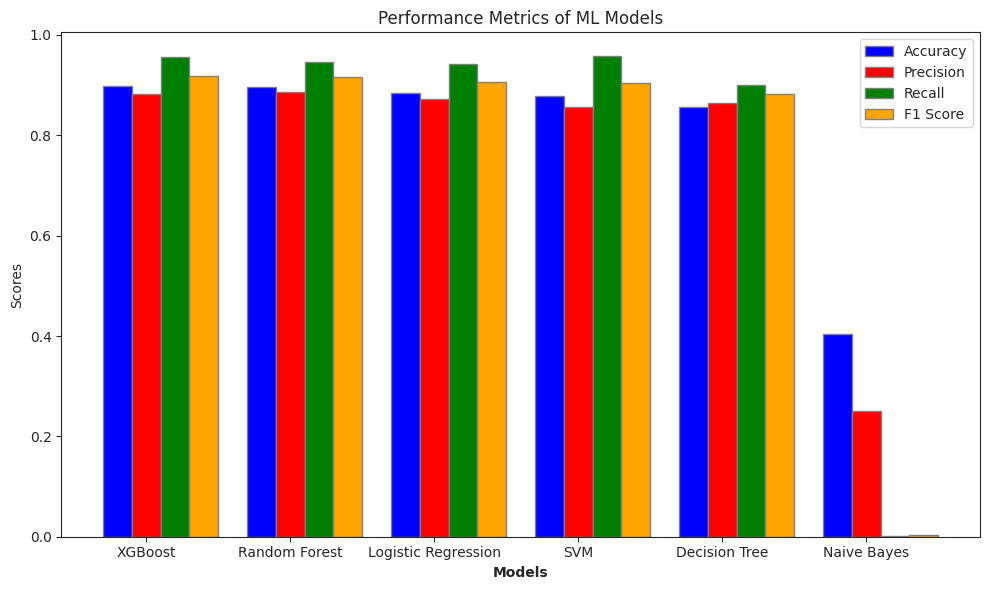

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data
models = ['XGBoost', 'Random Forest', 'Logistic Regression', 'SVM', 'Decision Tree', 'Naive Bayes']
accuracy = [0.8976, 0.8965, 0.8833, 0.8789, 0.8568, 0.4042]
precision = [0.8818, 0.8870, 0.8714, 0.8557, 0.8645, 0.2500]
recall = [0.9555, 0.9462, 0.9425, 0.9573, 0.8998, 0.0019]
f1_score = [0.9172, 0.9156, 0.9055, 0.9037, 0.8818, 0.0037]

# Set width of bars
bar_width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='r', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_score, color='orange', width=bar_width, edgecolor='grey', label='F1 Score')

# Add labels, title, and legend
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.ylabel('Scores')
plt.title('Performance Metrics of ML Models')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
